In [1]:
import jaccard_recs as jr
import networkx as nx

In [2]:
user_dict = jr.import_user_dict(filepath="..\\data\\pickled-data\\user_dict.p")

In [3]:
edges = jr.edgelist_from_user_dict(user_dict)

In [4]:
train, test = jr.train_test_split_edgelist(edges)

In [5]:
G = nx.DiGraph(train)

In [6]:
all_jaccard_coefficients = list(jr.jaccard_coefficient(G))

### Evaluate recs w/ precision at k (_P@k(u)_) items recommended

In [9]:
p_at_k_all = jr.calculate_precision_at_k(G, all_jaccard_coefficients,
                                         test_data=test, n=200, k=50, seed=123)

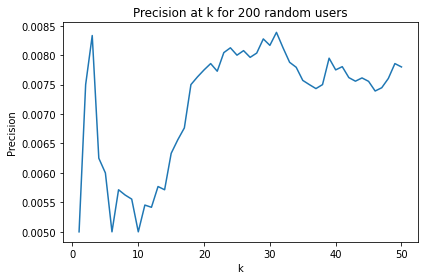

In [10]:
avg_p_at_k_all = jr.calculate_avg_precision_at_k(p_at_k_all=p_at_k_all)

## Under Development: Get communities

Ignore all of this community stuff for now

In [247]:
G_louvain = nx_comm.louvain_communities(G, seed=123, resolution=0.75)

In [248]:
len(G_louvain)

79

In [ ]:
[len(community) for community in G_louvain]

In [184]:
G_greedymod = nx_comm.greedy_modularity_communities(G, resolution=0.5)

In [185]:
len(G_greedymod)

14

In [186]:
[len(community) for community in G_greedymod]

[3343, 14, 13, 6, 6, 4, 4, 2, 2, 2, 2, 2, 2, 2]

In [192]:
G_asyn_lpa = nx_comm.asyn_lpa_communities(G, seed=123)

In [190]:
len(list(G_asyn_lpa))

9

In [193]:
[len(community) for community in list(G_asyn_lpa)]

[3342, 24, 2, 8, 4, 3, 4, 5, 12]

I'm going to use Louvain communities for now because the other two algorithms are primarily stuck on one very large cluster and a few others that are too small to be useful.

In [198]:
i = 1
community_dict = {}

for comm in G_louvain:
    for user in comm:
        community_dict[user] = i
    i += 1

In [232]:
print(f"User 'jack' is in community {community_dict['jack']}.")
print(f"User 'teaequalsbliss' is in community {community_dict['teaequalsbliss']}.")
print(G.nodes['teaequalsbliss'])

User 'jack' is in community 2.
User 'teaequalsbliss' is in community 4.
{'community': 4}


Okay, we've successfully segmented the network. Now we map the corresponding community to the node attribute "community".

In [208]:
nx.set_node_attributes(G, community_dict, "community")

In [ ]:
all_jaccard_coefficients = community_jaccard_coefficients(G, G_louvain)